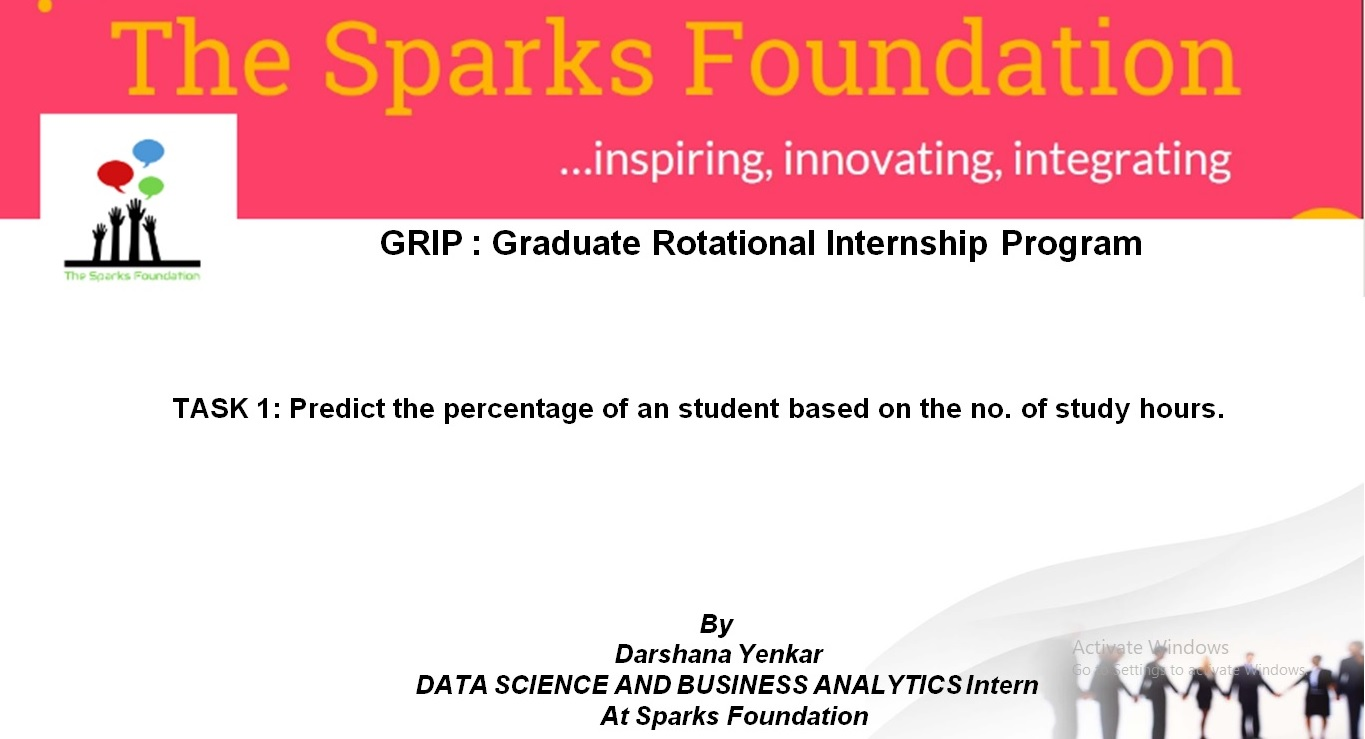


### The Spark Foundation - GRIP - DATA SCIENCE AND BUSINESS ANALYTICS Intern

Author : Darshana Yenkar

TASK 1: Predict the percentage of an student based on the no. of study hours. 

This is a simple linear regression task as it involves just 2 variables.


USING : linear regression

#### Data can be found at http://bit.ly/w-data

STEP1: Importing Dataset

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
#import scipy.stats as stats
%matplotlib inline

In [7]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df = df.to_csv('df.csv')
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Step2: Getting Information about Dataset

In [8]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
df.shape

(25, 2)

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Checking No. of Null and Duplicated columns

In [13]:
df.isnull().sum()

0

In [11]:
df.duplicated().sum()

0

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

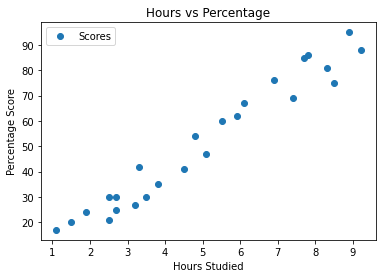

In [12]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [37]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [38]:
df.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

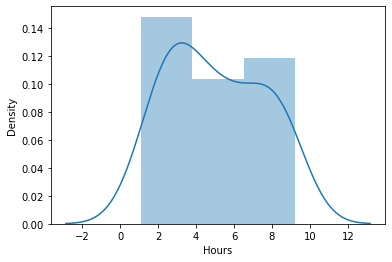

In [39]:
sns.distplot(df['Hours'])

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

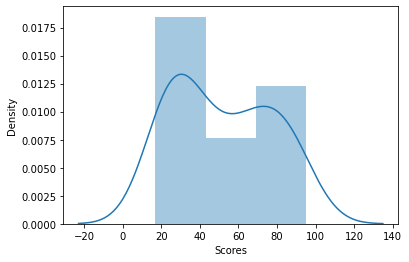

In [41]:
sns.distplot(df['Scores'])

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [42]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Y=B0+B1(X)

In [50]:
regressor.intercept_    

2.018160041434683

In [51]:
regressor.coef_

array([9.91065648])

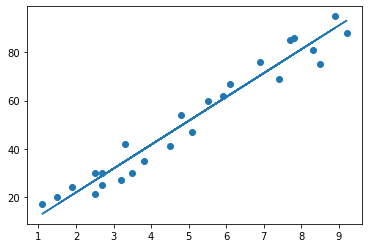

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [46]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [48]:
# You can also test with your own data
Hours = 9.25
own_pred=regressor.predict([[Hours]])
print("The Predicted score if a person studies for",Hours,"hours is",own_pred[0])

The Predicted score if a person studies for 9.25 hours is 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and r square. There are many such metrics.

In [49]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 score:',r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R2 score: 0.9454906892105356


### Thank You